In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r'C:\Users\njhar\Downloads\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# missing values/null values checking

In [4]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: >

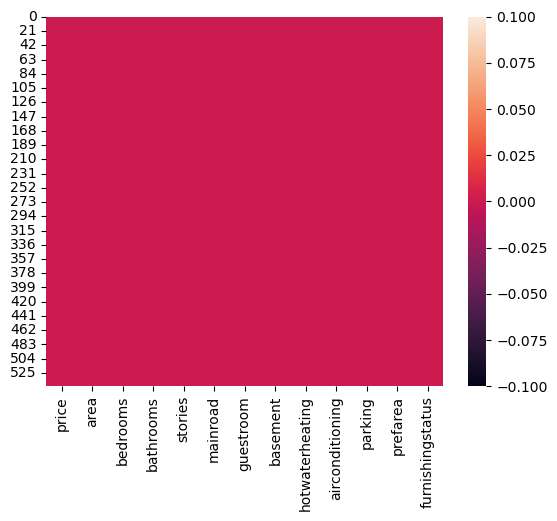

In [11]:
sns.heatmap(df.isna())

In [5]:
# duplicated values checking

In [6]:
df.duplicated().sum()

0

In [7]:
# information about dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# unique values identification

In [10]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [13]:
# converting categorical values to numerical values

In [15]:
cat_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

In [16]:
# Iterate through categorical columns (excluding the last one) in the DataFrame 'df'
for col in cat_col[:-1]:
    # Convert values to binary (1 for 'yes' and 0 for anything else) using a lambda function
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
df1 = df.copy()

In [22]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [23]:
# descriptive statistics 
df1.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [30]:
# converting categorical to numerical columns
furnishing_mapping = {
    'furnished': 1,
    'semi-furnished': 0,
    'unfurnished': -1 
}

In [32]:
# Use a lambda function with `apply` to convert the categorical data to numerical data
df1['furnishingstatus'] = df1['furnishingstatus'].apply(lambda x: furnishing_mapping[x])

In [33]:
df1['furnishingstatus']

0      1
1      1
2      0
3      1
4      1
      ..
540   -1
541    0
542   -1
543    1
544   -1
Name: furnishingstatus, Length: 545, dtype: int64

<Axes: >

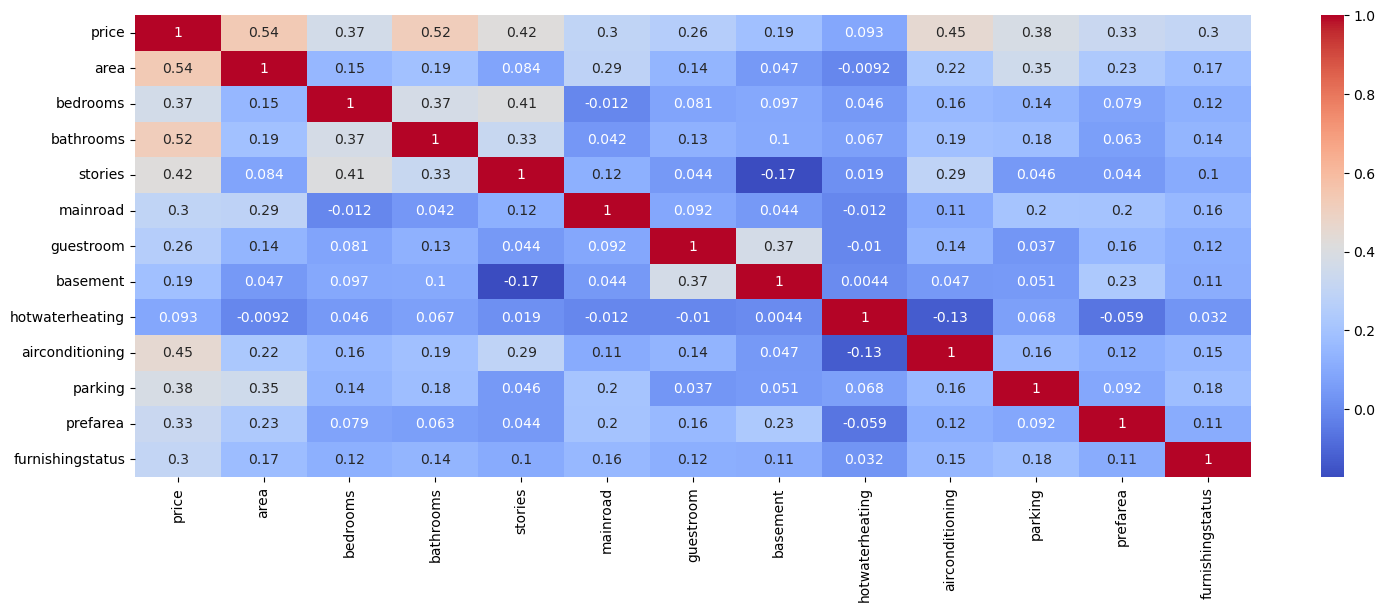

In [34]:
# checking correlation between variables 
plt.figure(figsize=(18,6))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)

In [35]:
# Removing outliers using (Z-score)
from scipy import stats

z = np.abs(stats.zscore(df1))

In [36]:
# z > 3 shows outliers it is thersold

print(np.where(z>3))

(array([  0,   1,   1,   2,   3,   4,   5,   5,   6,   7,   7,  10,  11,
        11,  13,  20,  28,  33,  36,  66,  66,  69,  74,  75,  80,  84,
        89, 109, 112, 125, 143, 153, 165, 195, 196, 211, 270, 290, 298,
       321, 334, 350, 363, 364, 378, 395, 403, 464, 490, 499, 530],
      dtype=int64), array([0, 0, 3, 0, 0, 0, 0, 3, 3, 1, 3, 1, 3, 8, 8, 8, 8, 3, 8, 1, 8, 1,
       8, 8, 8, 8, 3, 8, 2, 1, 8, 3, 8, 3, 8, 1, 8, 3, 8, 8, 8, 8, 8, 8,
       8, 2, 1, 8, 8, 3, 8], dtype=int64))


In [37]:
# Removing

new_df = df1[(z<3).all (axis = 1)]  # New dataset without outliers

In [38]:
new_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,-1
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,0
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,0
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0


In [39]:
new_df.shape

(499, 13)

In [49]:
# understanding variables with new data (without outliers)
# Numerical columns
num_col = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

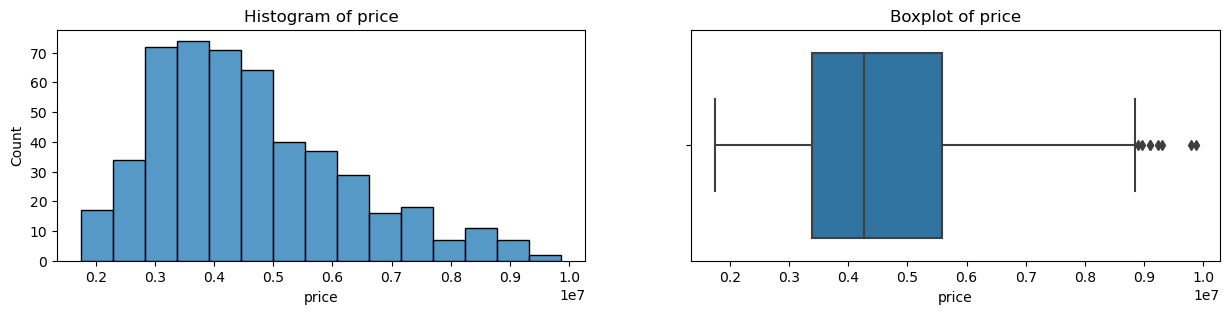

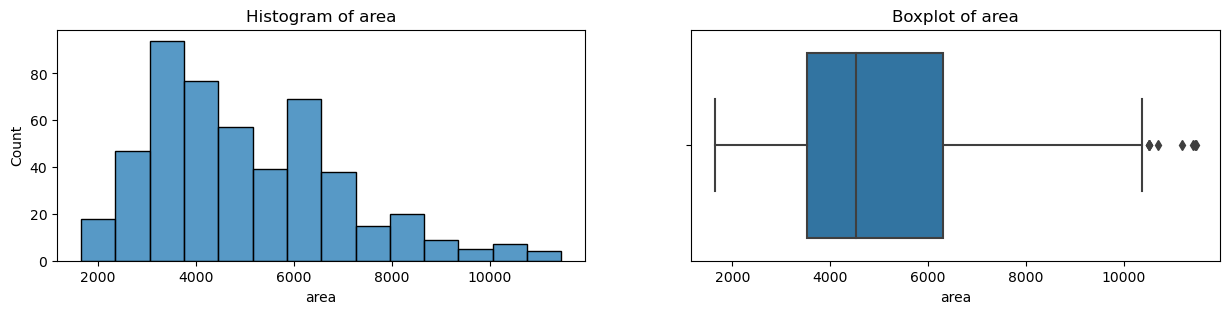

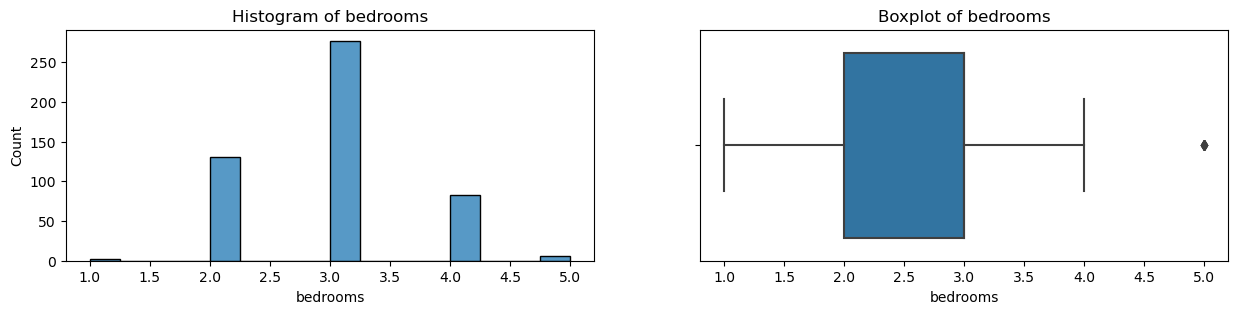

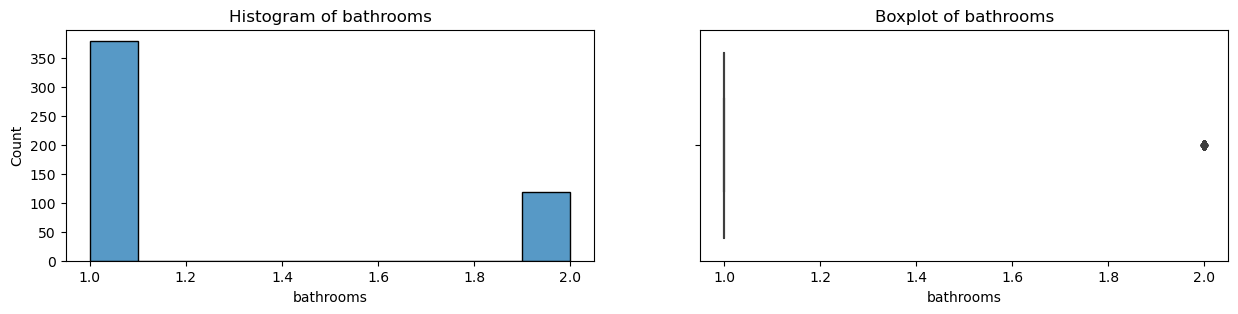

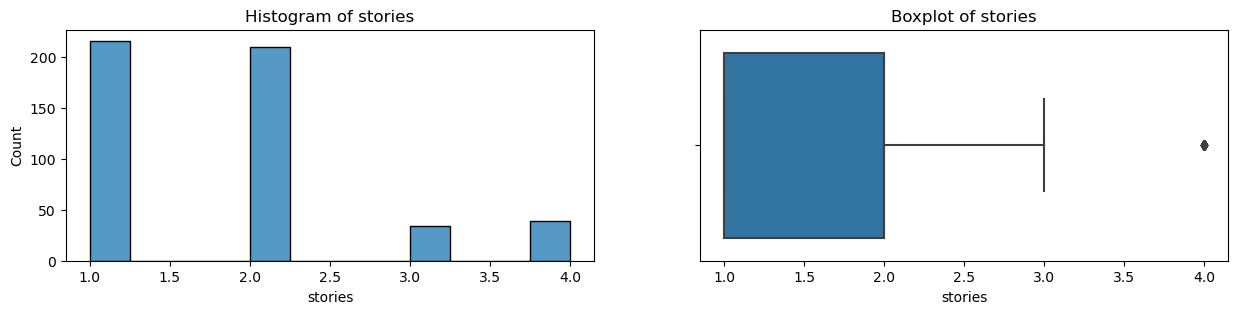

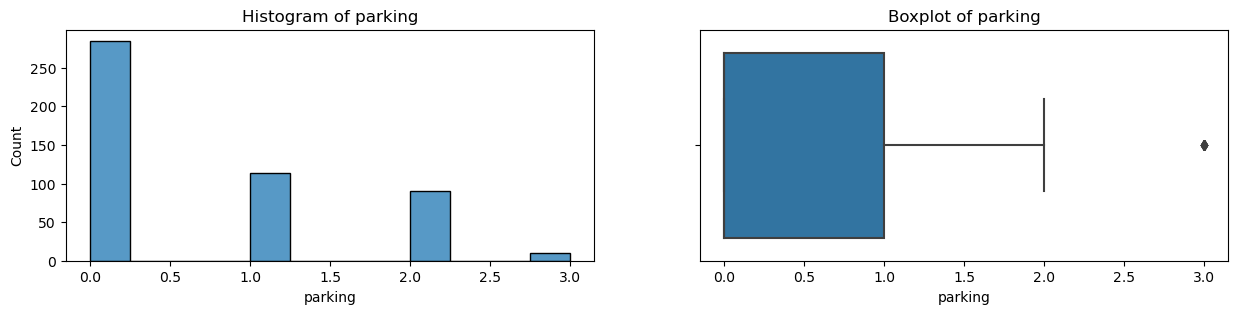

In [51]:
for col in num_col:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
    
    # Histogram plot
    sns.histplot(new_df[col], ax=ax[0])
    ax[0].set_title(f'Histogram of {col}')
    
    # Box plot
    sns.boxplot(x=new_df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    
    plt.show()

In [56]:
# categorical columns
cat_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

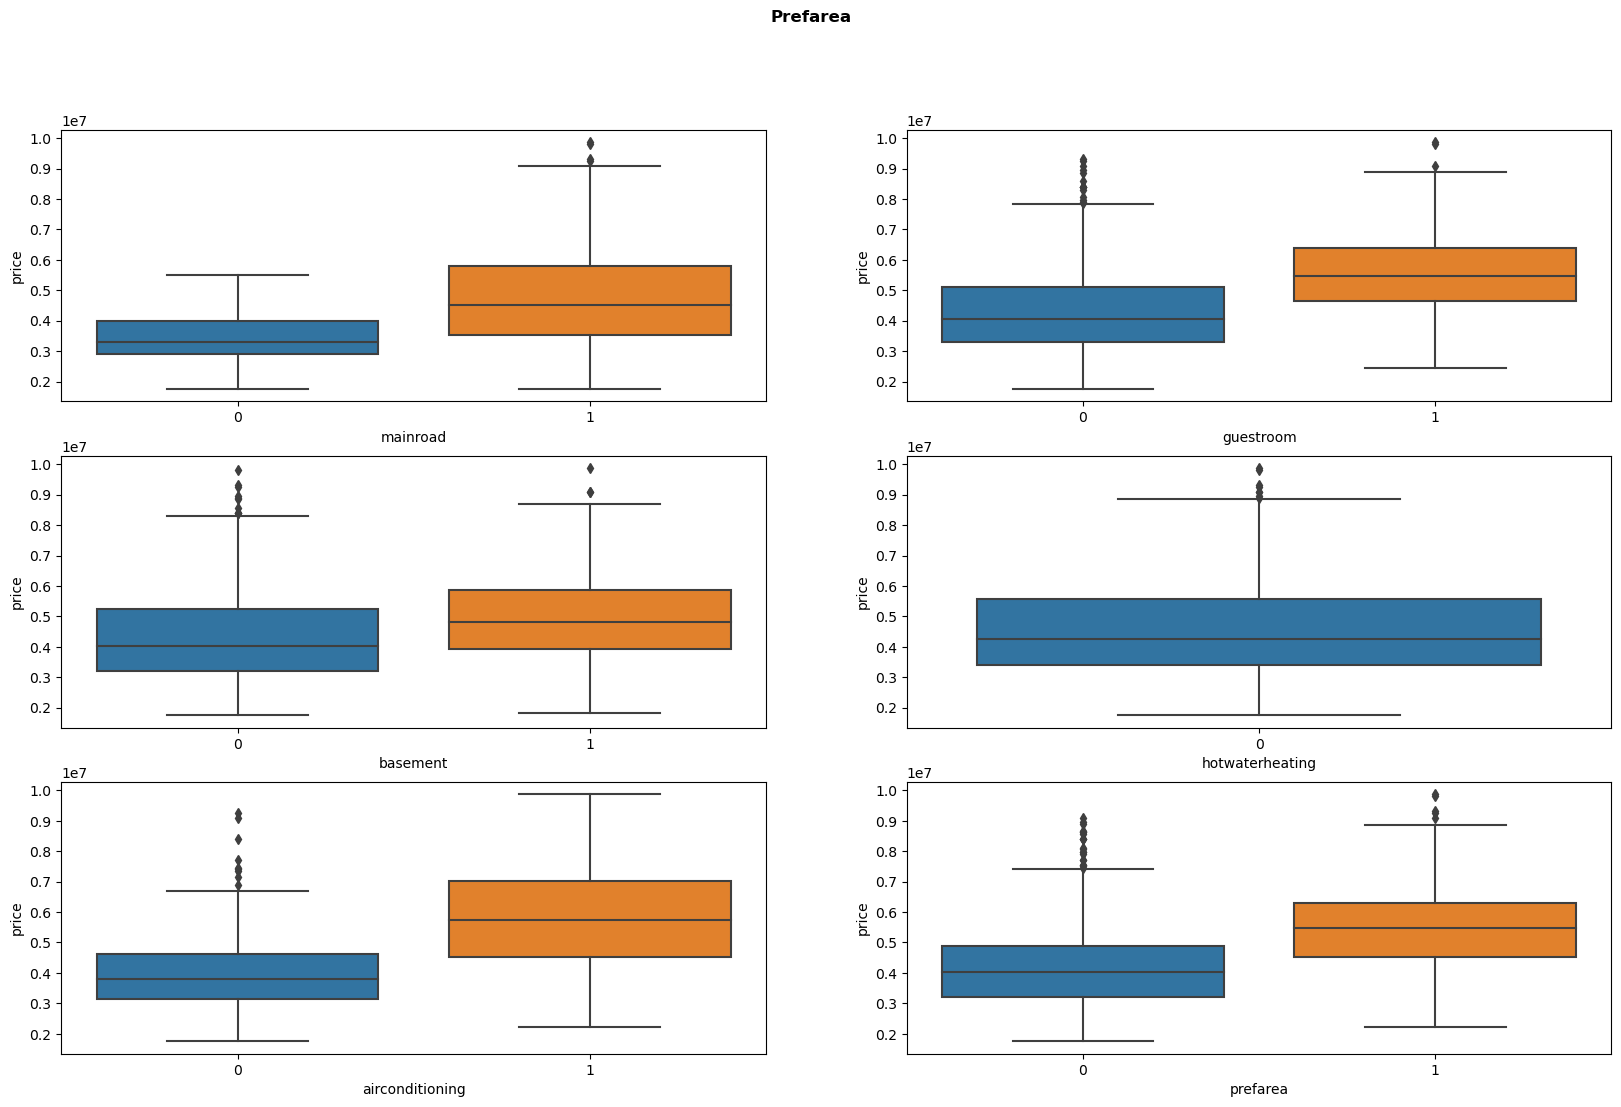

In [59]:
plt.figure(figsize=(20, 12))
for i in range(len(cat_col[:-1])):
    plt.subplot(3,2,i+1)
    sns.boxplot(x = new_df[cat_col[i]], y = new_df.price )
    plt.suptitle(f'{col.title()}',weight='bold')
plt.show()

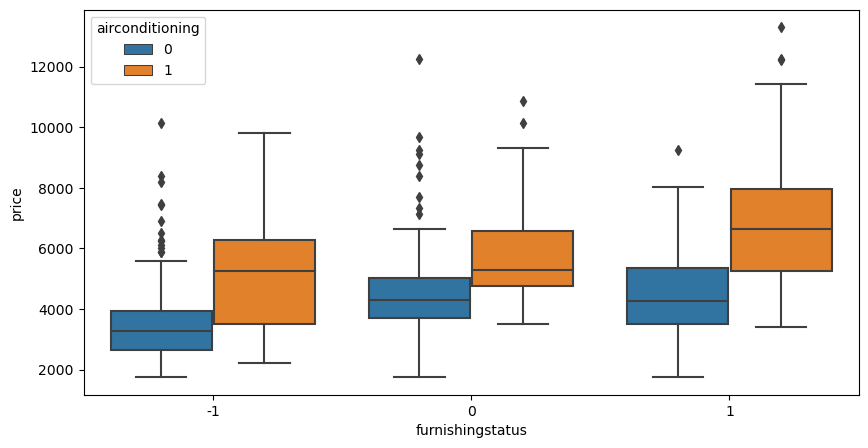

In [64]:
# Furnishing status
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = df['price']/1000, hue = 'airconditioning', data = df)
plt.show()

In [86]:
# train and test data 
X = new_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating',
             'airconditioning','parking','prefarea','furnishingstatus']]   # Independent Features
y = new_df['price'] # Dependent Features

In [87]:
# linear Model

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 12)
(100, 12)
(399,)
(100,)


In [90]:
# Data Scaling using MinMaxScale

In [91]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
# Model Building

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# make prediction using test data
y_pred = lm.predict(X_test)

In [95]:
# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [96]:
mse = mean_squared_error ( y_test, y_pred ) # Mean Squared Error
print(f"Mean Squared Error (MSE): {mse}")
mae = mean_absolute_error ( y_test, y_pred )
print(f"Mean Absolute Error (MAE): {mae}")
r2 = r2_score ( y_test, y_pred ) # R2 
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1093810096296.3846
Mean Absolute Error (MAE): 769209.1217270974
R-squared (R2): 0.6666185610840384


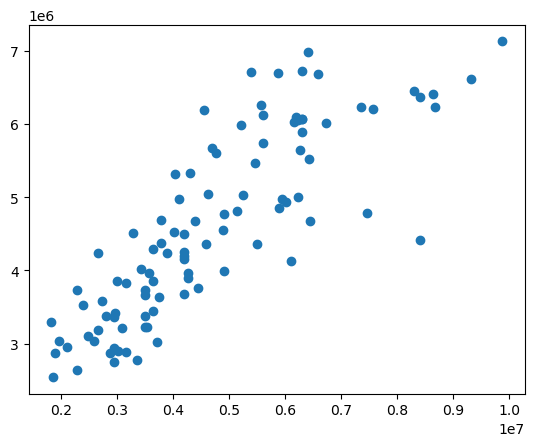

In [97]:
# prediction plot using scatter plot

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [101]:
# Manually input features for prediction

new_data = np.array([[9100,4,1,2,1,1,1,0,1,2,1,1]]) # Replace these values with your own features

# Make predictions on the new data
predicted_price = lm.predict(new_data)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 19990986983.703495
